<a href="https://colab.research.google.com/github/Adamfk1/Practica-ML-1/blob/main/NOTEBOOK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1
## Sección 1: EDA
En esta sección, vamos a explorar el dataset para entender los datos y el problema que estamos intentando resolver. También realizaremos algunos pasos de preprocesamiento para preparar los datos para el modelado. 

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns


In [2]:
# Cargamos el dataset
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

### Determinar instances y features
Usando la forma del dataset, encontramos el número de columnas(features) y filas(instances) en el dataset.

In [3]:
# Número de instances y features
num_instances, num_features = wind_ava.shape

## TODO: When we use wind_ava.gz, we get much less features, why?

print(f"Número de instances: {num_instances}")
print(f"Número de features: {num_features}")

Número de instances: 4748
Número de features: 552


### Determinar tipo de las variables
Guardamos los tipos de los datos que tenemos en nuestro dataset e iteramos por ellos para dividirlos en dos sets: númericos y categóricos.

In [4]:
# Determinar el tipo de cada columna
data_types = wind_ava.dtypes


# Inicializar listas para guardar los nombres de variables categóricas y numéricas
categorical_vars = []
numerical_vars = []


# Iterar por los tipos de datos y separar las variables por tipo
for column, dtype in data_types.items():
    if dtype == 'object' or dtype.name == 'category':
        categorical_vars.append(column)
    else:
        numerical_vars.append(column)

# Imprimir los resultados
print("Variables categóricas:", categorical_vars)
print("Variables numéricas:", numerical_vars)


"""
Para ver mejor las variables numéricas, usar este print en vez del anterior:

print("Numerical variables:")
for i in range(0, len(numerical_vars), 10): 
    print(', '.join(numerical_vars[i:i + 10]))

"""

Variables categóricas: ['datetime']
Variables numéricas: ['energy', 'p54.162.1', 'p54.162.2', 'p54.162.3', 'p54.162.4', 'p54.162.5', 'p54.162.6', 'p54.162.7', 'p54.162.8', 'p54.162.9', 'p54.162.10', 'p54.162.11', 'p54.162.12', 'p54.162.13', 'p54.162.14', 'p54.162.15', 'p54.162.16', 'p54.162.17', 'p54.162.18', 'p54.162.19', 'p54.162.20', 'p54.162.21', 'p54.162.22', 'p54.162.23', 'p54.162.24', 'p54.162.25', 'p55.162.1', 'p55.162.2', 'p55.162.3', 'p55.162.4', 'p55.162.5', 'p55.162.6', 'p55.162.7', 'p55.162.8', 'p55.162.9', 'p55.162.10', 'p55.162.11', 'p55.162.12', 'p55.162.13', 'p55.162.14', 'p55.162.15', 'p55.162.16', 'p55.162.17', 'p55.162.18', 'p55.162.19', 'p55.162.20', 'p55.162.21', 'p55.162.22', 'p55.162.23', 'p55.162.24', 'p55.162.25', 'cape.1', 'cape.2', 'cape.3', 'cape.4', 'cape.5', 'cape.6', 'cape.7', 'cape.8', 'cape.9', 'cape.10', 'cape.11', 'cape.12', 'cape.13', 'cape.14', 'cape.15', 'cape.16', 'cape.17', 'cape.18', 'cape.19', 'cape.20', 'cape.21', 'cape.22', 'cape.23', 'cape.

'\nPara ver mejor las variables numéricas, usar este print en vez del anterior:\n\nprint("Numerical variables:")\nfor i in range(0, len(numerical_vars), 10): \n    print(\', \'.join(numerical_vars[i:i + 10]))\n\n'

### Determinar los valores que faltan
Comprobamos todas las celdas en el dataset y las variables en que están contenidas.

In [5]:
# Buscar missing values en cada columna
missing_values = wind_ava.isnull().sum()

# Filtrar columnas que tengan missing values
variables_with_missing = missing_values[missing_values > 0]

# Imprimir las variables que tengan missing values y los datos que faltan
print("Variables con missing values y la cuenta de los datos que faltan:")
if len(variables_with_missing) > 0:
    print(variables_with_missing)
else:
    print("No hay missing variables")


Variables con missing values y la cuenta de los datos que faltan:
No hay missing variables


### Determinar valores constantes
Verificamos todas nuestras columnas. Si alguna de ellas contiene un valor único en toda la columna,
encontrado usando nunique, entonces esa es una columna constante. Si se encuentra alguno, lo eliminamos del conjunto de datos.

In [6]:
# Identificar columnas constantes
constant_columns = [col for col in wind_ava.columns if wind_ava[col].nunique() == 1]

# Imprimir columnas constantes
print("Columnas constantes para quitar", constant_columns)

# Quitar las columnas constantes del dataset
wind_ava_cleaned = wind_ava.drop(columns=constant_columns)

# Comprobar si se encontraron columnas constantes
if len(constant_columns) > 0:
    print("Columnas constantes encontradas")
    # Imprimir la forma del dataset antes y después de quitar las columnas constantes
    print("Forma del dataset antes de quitar columnas constantes:", wind_ava.shape)
    print("Forma del dataset después de quitar columnas constantes:", wind_ava_cleaned.shape)
    wind_ava = wind_ava_cleaned
else:
    print("No hay columnas constantes")

Columnas constantes para quitar []
No hay columnas constantes


### Determine tipo del problema: Clasificación vs Regresión
Determinamos la naturaleza del problema analizando la columna "energía", nuestra variable objetivo.
Si la "energía" es numérica y tiene una amplia gama de valores únicos, sugiere un problema de regresión.
Utilizamos un umbral para valores únicos más apropiado para el contexto debido a la naturaleza continua de la producción de energía.

In [7]:
# Examinamos la columna 'energy'
unique_values = wind_ava['energy'].unique()
num_unique = len(unique_values)
data_type = wind_ava['energy'].dtype

# Imprimimos el resultado
print(f"Número de valores únicos en 'energía': {num_unique}")
print(f"Tipo de 'energía': {data_type}")

# Establecer un nuevo umbral basado en el tamaño del conjunto de datos
threshold = 0.01 * len(wind_ava)  # 1% del total de instancias

# Determinar si el problema es clasificación o regresión
if data_type in ['int64', 'float64'] and num_unique > threshold:
    print("Parece un problema de regresión.")
else:
    print("Parece un problema de clasificación")


Número de valores únicos en 'energía': 4543
Tipo de 'energía': float64
Parece un problema de regresión.


In [8]:
# Listamos todas las columnas en el dataset
all_columns = wind_ava.columns.tolist()

# Identificar columnas a conservar 
#(aquellas relacionadas con la ubicación de Sotavento o datos no meteorológicos)
sotavento_columns = ['energy'] + [col for col in all_columns if '.13' in col]
# Nos quedamos con las columnas importantes
wind_ava_sotavento = wind_ava[sotavento_columns]

# Imprimimos el nuevo dataset
print("Forma del dataset después de quitar variables no relevantes:", wind_ava_sotavento.shape)


Forma del dataset después de quitar variables no relevantes: (4748, 23)


## Extra: Análisis
En esta sección, analizaremos los datos para comprender las relaciones entre las características y la variable objetivo.

### Pruebas de correlación
En la siguiente sección, probamos la correlación de los datos de sotavento.

In [9]:
# Calcular y mostrar la matriz de correlación.
correlation_matrix = wind_ava_sotavento.corr()
energy_correlations = correlation_matrix['energy'].sort_values(ascending=False)
print(energy_correlations)

energy        1.000000
p59.162.13    0.446710
inss.13       0.345784
iews.13       0.323979
v10n.13       0.310246
v100.13       0.302290
v10.13        0.301370
u10.13        0.244619
u10n.13       0.241616
u100.13       0.236615
fsr.13        0.232329
flsr.13       0.151233
p55.162.13    0.000785
stl4.13      -0.046865
cape.13      -0.047995
t2m.13       -0.161310
stl3.13      -0.165994
sp.13        -0.191786
stl2.13      -0.192833
stl1.13      -0.197850
lai_lv.13    -0.211480
lai_hv.13    -0.213400
p54.162.13   -0.239832
Name: energy, dtype: float64



**Análisis de correlación**
Hay variables como p59.162.13,inss.13 y v10n.13 que tienen un impacto positivo en la variable resultado energía, es decir, cuando estas aumentan también aumenta la energía producida. 

Variables como t2m.13, stl3.13 y lai_hv.13 tienen un coeficiente de correlación negativo, lo que sugiere que al aumentar estas la producción de energía disminuye.

Otras variables como p55.162.13 tienen un coeficiente de correlación muy bajo y podemos deducir que no influyen mucho en la variable de energía. 

Esto se aplica a las variables pertenecientes a Sotavento, y podría no ser verdad para las demás zonas.

ANÁLISIS DE LA TEMPERATURA

En el análisis de la correlación hemos determinado que la temperatura t2m.13 tenía un coeficiente de correlación negativo, y ahora vamos a confirmar que esto es así representando la relación entre la energía y la temperatura en una gráfica:

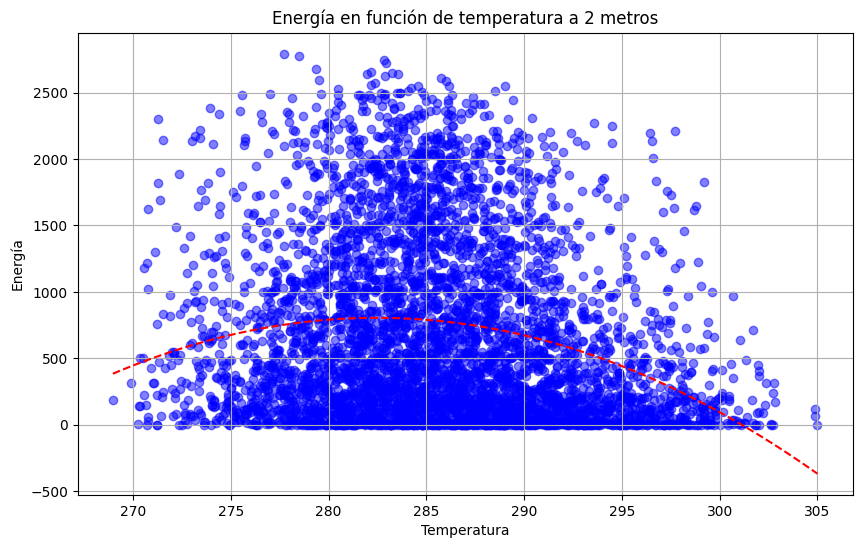

In [10]:
#Distribución de la energía

energy_output=wind_ava_sotavento['energy']

#Distribución de la temperatura
temperature_output=wind_ava_sotavento['t2m.13']

#Creación del scatterplot
plt.figure(figsize=[10,6])
plt.scatter(temperature_output,energy_output,color='blue',alpha=0.5)
plt.title('Energía en función de temperatura a 2 metros')
plt.xlabel('Temperatura')
plt.ylabel('Energía')
plt.grid(True)

#Creación de la curva del polinomio cuadrático que muestra la relación
z= np.polyfit(temperature_output,energy_output,2)
p=np.poly1d(z)
temperature_range= np.linspace(min(temperature_output),max(temperature_output),100)
plt.plot(temperature_range,p(temperature_range),"r--")

#Mostrar gráfica
plt.show()

Como se puede ver, en los valores entre 280 y 285 es cuando más energía se está produciendo. Sin embargo, a medida que se aumenta más la temperatura, la energía disminuye. Aquí se ve reflejada la correlación negativa que mencionábamos antes.

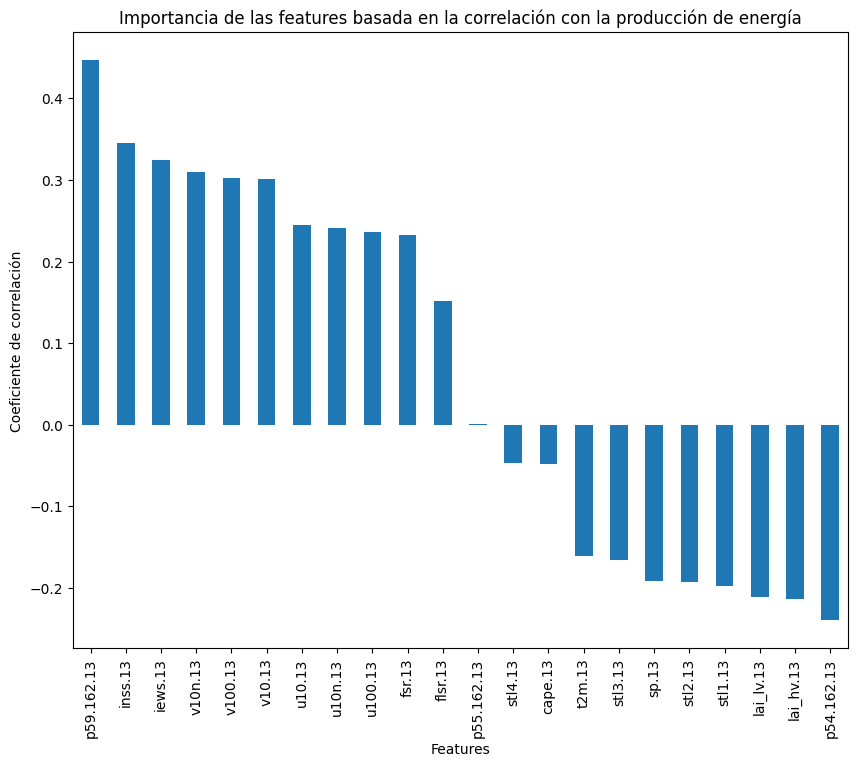

In [11]:
# Suponiendo que las correlaciones de energía ya estén definidas como se muestra
# energy_correlations = correlation_matrix['energy'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
energy_correlations.drop('energy').plot(kind='bar')  # Excluir la correlación 'energía' y 'energía'
plt.title('Importancia de las features basada en la correlación con la producción de energía')
plt.xlabel('Features')
plt.ylabel('Coeficiente de correlación')
plt.show()


El gráfico anterior muestra mejor la importancia de las features según la correlación con la producción de energía.

### Pruebas distribución
Analizamos la distribución de la variable objetivo "energía" para comprender los valores y el rango típicos.

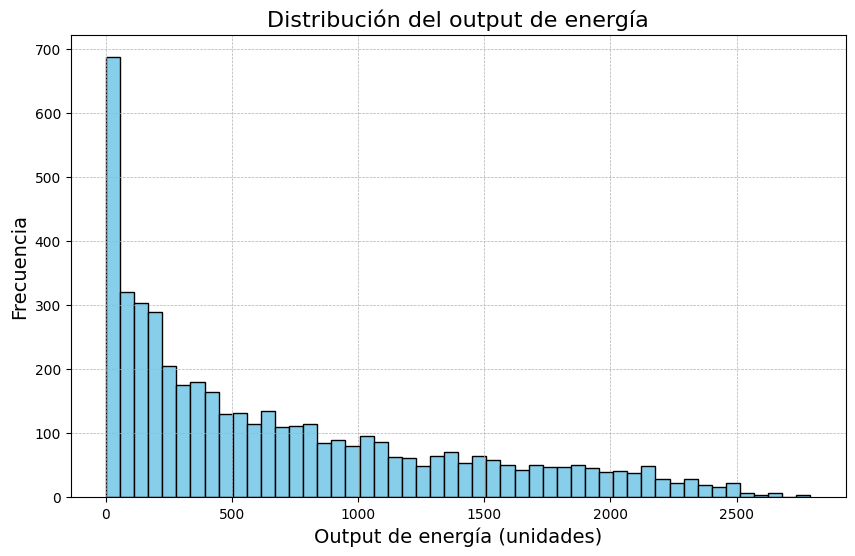

In [12]:
# Plot de la distribución de 'energy'
energy_output = wind_ava_sotavento['energy'] 

# Creamos el histograma
plt.figure(figsize=[10,6])  
plt.hist(energy_output, bins=50, color='skyblue', edgecolor='black')  

# Añadir labels y title
plt.xlabel('Output de energía (unidades)', fontsize=14)  
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución del output de energía', fontsize=16)

# Añadir grid para mejor legibilidad
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostrar el histograma
plt.show()

**Análisis de la distribución** 
La distribución está claramente sesgada a la derecha, lo que indica que los valores más bajos son mucho más comunes que los más altos. Este sesgo sugiere que son frecuentes las bajas producciones de energía. El gráfico sugiere que, si bien pueden ocurrir casos de alta producción de energía, son bastante raros, especialmente después de 2500 unidades de energía. Esta distribución sesgada podría influir en nuestro análisis y modelado de datos, lo que sugiere la necesidad de transformarlos para modelarlos mejor.

### Detección de outliers
En la siguiente sección, utilizaremos un box diagram para visualizar los outliers en nuestro conjunto de datos.

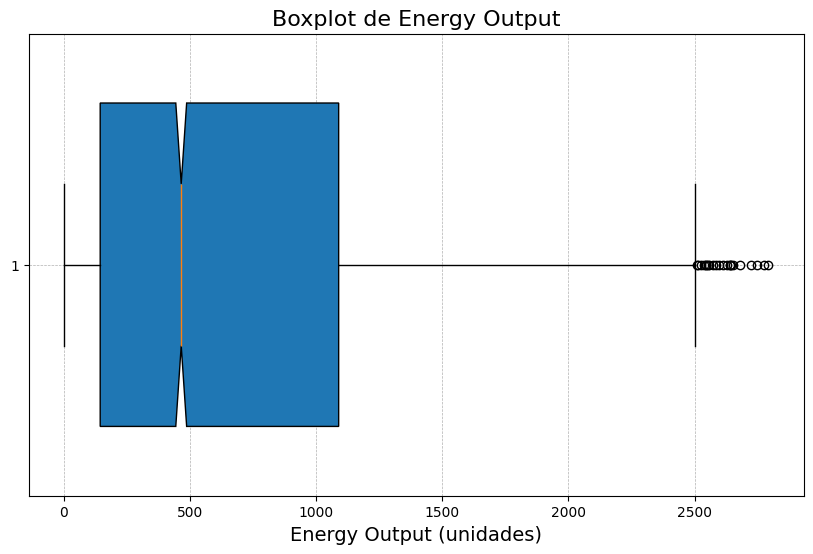

In [13]:
#energy_output = wind_ava_sotavento['energy']
plt.figure(figsize=[10,6])  
plt.boxplot(energy_output, vert=False, patch_artist=True, notch=True, widths=0.7)  # Hacemos el boxplot horizontal para mejor visibilidad

plt.title('Boxplot de Energy Output', fontsize=16)
plt.xlabel('Energy Output (unidades)', fontsize=14)  

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**Análisis de outliers** 
La distribución muestra algunos outliers, que son casos de producción de energía significativamente mayores que el resto de los datos. El histograma anterior sugiere que estos outliers son casos raros de alta producción de energía.

## Sección 3: Decisiones de evaluación interna y externa
En esta sección, explicaremos nuestra decisión sobre cómo realizaremos las evaluaciones internas y externas.

#### Evaluación externa
Usaremos k-fold cross-validation para nuestra evaluación externa.

**Métricas**: dado que la variable objetivo es la energía y es un valor continuo, usaremos el RMSE como nuestra métrica principal. Con eso, podemos medir el error promedio usando RMSE.

#### Evaluación interna
Usaremos grid search combinada con cross-validation para nuestra evaluación interna.

**Métricas**: Usaremos RMSE nuevamente.


## Sección 3: Método de escalada
En esta sección, explicaremos nuestra decisión actual sobre qué método de escalado usaremos para nuestro conjunto de datos.

Probaremos los tres métodos de escala: MinMaxScaler, StandardScaler y RobustScaler. Luego compararemos los resultados para determinar qué método es mejor para nuestro conjunto de datos. Se utilizará KNN con 5 folds.

### Preparación de los datos
Prepararemos los datos que se utilizarán para todos los modelos de esta sección. Después de probar todas las técnicas, sacaremos las primeras conclusiones.

In [14]:
from sklearn.model_selection import train_test_split

# Partimos el dataset en features y target variable
X = wind_ava_sotavento.drop('energy', axis=1)
y = wind_ava_sotavento['energy']

# Partimos el dataset en training y test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=438770)



Ahora probaremos los scalers en nuestros sets train-test y evaluar los resultados.

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# Definimos k-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=438770)

# Definimos los scalers que vamos a probar
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Diccionario para guardar los resultados de la cross-validation
outer_scores = {}

# Iterar por los scalers
for name, scaler in scalers.items():
    # Crear una Pipeline para los scalers y KNN
    pipeline = Pipeline([
        ('scaler', scaler),
        ('knn', KNeighborsRegressor())
    ])
    
    # Evaluamos el modelo mediante cross-validation y lo guardamos en external_scores
    # Nota: cross_val_score devuelve puntuaciones MSE negativas; las convertiremos a RMSE
    neg_mse_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=outer_cv)
    rmse_scores = np.sqrt(-neg_mse_scores)  # Convertir MSE a RMSE
    outer_scores[name] = rmse_scores.mean()  # Guardar RMSE medio

# Imprimir resumen de resultados
print("\nResumen del RMSE promedio para diferentes scalers con KNN (evaluación externa):")
for scaler, rmse in outer_scores.items():
    print(f"{scaler}: {rmse:.4f}")



Resumen del RMSE promedio para diferentes scalers con KNN (evaluación externa):
StandardScaler: 409.7790
MinMaxScaler: 424.6975
RobustScaler: 417.0040


## Section 4A: Evaluación del modelo
En esta sección, crearemos un modelo utilizando diferentes técnicas de aprendizaje automático: KNN, árboles de regresión, regresión lineal normal y de Lasso y SVM. Luego compararemos los resultados y los tiempos de entrenamiento y repetiremos el proceso con ajuste de hiperparámetros. Finalmente, sacaremos conclusiones en base a los resultados.

In [16]:
from sklearn.model_selection import cross_validate, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
import numpy as np
import time

# Definir TimeSeriesSplit para cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Listado de Pipelines para evaluar
models = {
    'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor()),
    'RegressionTree': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=438770)),
    'LinearRegressionNormal': make_pipeline(StandardScaler(), LinearRegression()),
    'LinearRegressionLasso': make_pipeline(StandardScaler(), Lasso(alpha=1.0, max_iter=10000, random_state=438770)),
    'SVM': make_pipeline(StandardScaler(), SVR())
}


# Diccionario para guardar resultados
cv_results = {}

# Usar cross-validate para cada modelo
for name, model in models.items():
    start_time = time.time()
    scores = cross_validate(model, X, y, cv=tscv, scoring='neg_mean_squared_error', return_train_score=True)
    end_time = time.time()

    rmse_scores = np.sqrt(-scores['test_score'])  # Convertir MSE a RMSE
    avg_rmse = np.mean(rmse_scores)
    avg_time = np.mean(scores['fit_time'])
    total_time = end_time - start_time

    cv_results[name] = {
        'RMSE': avg_rmse,
        'Average Fit Time': avg_time,
        'Total Evaluation Time': total_time
    }


Display the results of the models and their training times.

In [17]:

print("Output de energía mínima:", np.min(y))
print("Output de energía máxima:", np.max(y))
print("Output de energía máxima:", np.mean(y))
print("Desviación estándar de output de energía:", np.std(y))

print("\n\n")  

def print_results(results):
    for model, metrics in results.items():
        print(f"{model}:")
        print(f"    Tiempo de Evaluación total: {metrics['Total Evaluation Time']:.4f} seconds")
        print(f"    Average Fit Time: {metrics['Average Fit Time']:.4f} seconds")
        print(f"    RMSE medio: {metrics['RMSE']:.4f}\n")

print_results(cv_results)


Output de energía mínima: 0.01
Output de energía máxima: 2792.55
Output de energía máxima: 693.126246840775
Desviación estándar de output de energía: 665.4615198629809



KNN:
    Tiempo de Evaluación total: 0.1014 seconds
    Average Fit Time: 0.0018 seconds
    RMSE medio: 442.9408

RegressionTree:
    Tiempo de Evaluación total: 0.2851 seconds
    Average Fit Time: 0.0550 seconds
    RMSE medio: 524.0404

LinearRegressionNormal:
    Tiempo de Evaluación total: 0.7497 seconds
    Average Fit Time: 0.1113 seconds
    RMSE medio: 565.7563

LinearRegressionLasso:
    Tiempo de Evaluación total: 1.8148 seconds
    Average Fit Time: 0.3047 seconds
    RMSE medio: 563.0435

SVM:
    Tiempo de Evaluación total: 3.6358 seconds
    Average Fit Time: 0.1594 seconds
    RMSE medio: 665.8124



### Análisis
De nuestras estadísticas de datos, deducimos lo siguiente:
- Buen RMSE: Menos de 320 unidades.
- RMSE aceptable: 320 a 641 unidades.
- RMSE pobre: Mayor a 641 unidades.


Según nuestros nuevos resultados, KNN es el mejor de todos los modelos, pero su RMSE está en el rango aceptable, no es bueno. Es rápido de entrenar, lo cual es una ventaja. El árbol de regresión y ambos tipos de regresión lineal también se encuentran en el rango aceptable para RMSE. Son rápidos, pero la variante Lasso no. A SVM no le ha ido bien, con el RMSE más alto que casi alcanza nuestro rango pobre y que además lleva más tiempo entrenar.

En general, ningún modelo ha alcanzado todavía el nivel RMSE "bueno". KNN parece mejor hasta ahora porque es lo suficientemente preciso y rápido. Intentaremos mejorar todos los modelos a continuación, centrándonos especialmente en KNN, ya que es líder hasta ahora.

## Sección 4B: HPO

En esta sección usaremos HPO para mejorar los modelos que hemos creado. Usaremos GridSearchCV para encontrar los mejores hiperparámetros para cada modelo. Luego compararemos los resultados y los tiempos de entrenamiento y sacaremos conclusiones basadas en los resultados.

In [18]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


# Guardar resultados para cada modelo
results = {

}

# Estrategia de inner cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=438770)


**KNN**

In [19]:
# Pipeline para KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Grid de hiperparámetros para KNN
knn_params = {
    'knn__n_neighbors': range(1, 31), 
    'knn__weights': ['uniform', 'distance'],  
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
}


# GridSearchCV para KNN con la grid de hiperparámetros expandida
knn_grid_search = GridSearchCV(knn_pipeline, knn_params, cv=inner_cv, scoring='neg_mean_squared_error', verbose=1)

# Iniciar timer para el proceso
start_time = time.time()
knn_grid_search.fit(X, y)  
end_time = time.time()

# Sacar los mejores parámetros y el RMSE
best_params = knn_grid_search.best_params_
best_rmse = np.sqrt(-knn_grid_search.best_score_)
training_time_hpo = end_time - start_time

# Imprimir los resultados
print(f"Mejores parámetros para KNN: {best_params}")
print(f"Mejor RMSE para KNN después de HPO: {best_rmse:.4f}")
print(f"Tiempo de entrenamiento HPO para KNN: {training_time_hpo:.4f} segundos")


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Mejores parámetros para KNN: {'knn__algorithm': 'auto', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Mejor RMSE para KNN después de HPO: 386.0259
Tiempo de entrenamiento HPO para KNN: 33.9088 segundos


**Regression Tree**

In [20]:
# Pipeline para RegressionTree
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tree', DecisionTreeRegressor(random_state=438770))
])

# Grid de hiperparámetros para RegressionTree
tree_params = {
    'tree__max_depth': range(1, 21), 
    'tree__min_samples_split': range(2, 11), 
}

# GridSearchCV para Regression Tree
tree_grid_search = GridSearchCV(tree_pipeline, tree_params, cv=inner_cv, scoring='neg_mean_squared_error', verbose=1)

# Iniciar contador
start_time = time.time()
tree_grid_search.fit(X, y)  
end_time = time.time()

# Extraer los resultados
best_params_tree = tree_grid_search.best_params_
best_rmse_tree = np.sqrt(-tree_grid_search.best_score_)
training_time_tree_hpo = end_time - start_time

# Imprimir los resultados
print(f"Mejores parámetros para RegressionTree: {best_params_tree}")
print(f"Mejor RMSE para RegressionTree después de HPO: {best_rmse_tree:.4f}")
print(f"Tiempo de entrenamiento HPO para RegressionTree: {training_time_tree_hpo:.4f} segundos")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Mejores parámetros para RegressionTree: {'tree__max_depth': 6, 'tree__min_samples_split': 8}
Mejor RMSE para RegressionTree después de HPO: 411.8250
Tiempo de entrenamiento HPO para RegressionTree: 48.6105 segundos


**Lasso**

In [21]:
from sklearn.linear_model import Lasso
import time
# Pipeline para Lasso
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=438770, max_iter=10000))  # max_iter 10000 inicialmente
])

# Grid de hiperparámetros para Lasso Regression
lasso_params = {
    'lasso__max_iter': [10000, 50000, 100000],  # Aumentar max_iter para tener más iteraciones
    'lasso__tol': [0.01, 0.001, 0.0001]  # Ajustar tolerancia 
}

# GridSearchCV para Lasso Regression
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_params, cv=inner_cv, scoring='neg_mean_squared_error', verbose=1)

# Iniciar proceso de optimización de hiperparámetros
start_time = time.time()
lasso_grid_search.fit(X, y)  
end_time = time.time()

# Extraer los mejores parámetros y el RMSE
best_params_lasso = lasso_grid_search.best_params_
best_rmse_lasso = np.sqrt(-lasso_grid_search.best_score_)
training_time_lasso_hpo = end_time - start_time

# Imprimir los resultados
print(f"Mejores parámetros para Lasso: {best_params_lasso}")
print(f"Mejor RMSE para Lasso después de HPO: {best_rmse_lasso:.4f}")
print(f"Tiempo de entrenamiento HPO para Lasso: {training_time_lasso_hpo:.4f} segundos")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parámetros para Lasso: {'lasso__max_iter': 10000, 'lasso__tol': 0.001}
Mejor RMSE para Lasso después de HPO: 545.9736
Tiempo de entrenamiento HPO para Lasso: 15.1697 segundos


**SVM**

In [22]:
# Estrategia para inner cross-validation
inner_cv = TimeSeriesSplit(n_splits=5)  

# Pipeline para SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVR())
])

# Grid de hiperparámetros para SVM
svm_params = {
    'svm__C': np.logspace(-3, 2, 6), 
    'svm__kernel': ['linear', 'poly', 'rbf'], 
    'svm__gamma': ['scale', 'auto'],  
}

# GridSearchCV para SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_params, cv=inner_cv, scoring='neg_mean_squared_error', verbose=1)

# Proceso de optimización de hiperparámetros
start_time = time.time()
svm_grid_search.fit(X, y) 
end_time = time.time()

# Extraer los mejores parámetros y RMSE
best_params_svm = svm_grid_search.best_params_
best_rmse_svm = np.sqrt(-svm_grid_search.best_score_)
training_time_svm_hpo = end_time - start_time

# Imprimir resultados
print(f"Mejores parámetros para SVM : {best_params_svm}")
print(f"Mejor RMSE para SVM después de HPO: {best_rmse_svm:.4f}")
print(f"Tiempo de entrenamiento HPO para SVM: {training_time_svm_hpo:.4f} seconds")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros para SVM : {'svm__C': 100.0, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Mejor RMSE para SVM después de HPO: 415.8016
Tiempo de entrenamiento HPO para SVM: 35.6499 seconds


In [23]:
# Storing results for each model in the 'results' dictionary
results['KNN'] = (best_params, best_rmse, training_time_hpo)
results['RegressionTree'] = (best_params_tree, best_rmse_tree, training_time_tree_hpo)
results['SVM'] = (best_params_svm, best_rmse_svm, training_time_svm_hpo)
results['Lasso'] = (best_params_lasso, best_rmse_lasso, training_time_lasso_hpo)

print("Resumen de rendimiento del modelo:\n")
for model_name, (params, rmse, time) in results.items():
    print(f"{model_name} Results:")
    print(f"    Mejores Parámetros: {params}")
    print(f"    Mejor RMSE: {rmse:.4f}")
    print(f"    HPO Training Time: {time:.4f} segundos\n")


Resumen de rendimiento del modelo:

KNN Results:
    Mejores Parámetros: {'knn__algorithm': 'auto', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
    Mejor RMSE: 386.0259
    HPO Training Time: 33.9088 segundos

RegressionTree Results:
    Mejores Parámetros: {'tree__max_depth': 6, 'tree__min_samples_split': 8}
    Mejor RMSE: 411.8250
    HPO Training Time: 48.6105 segundos

SVM Results:
    Mejores Parámetros: {'svm__C': 100.0, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
    Mejor RMSE: 415.8016
    HPO Training Time: 35.6499 segundos

Lasso Results:
    Mejores Parámetros: {'lasso__max_iter': 10000, 'lasso__tol': 0.001}
    Mejor RMSE: 545.9736
    HPO Training Time: 15.1697 segundos



## Sección 4C: Análisis

Según los resultados de HPO, KNN sigue siendo la mejor opción con el mejor RMSE, pero un poco más lento que antes debido a los hipereparámetros. El tiempo de entrenamiento aquí puede estar muy sesgado porque algunos de los modelos tenían más hiperparámetros o, en algunos casos, más valores para cada hiperparámetro. Esa es la razón detrás del tiempo de entrenamiento del Árbol de Regresión. Al final, utilizamos GridSearch, por lo que el tiempo depende casi exclusivamente de los hiperparámetros. ¿KNN es mejor que un dummy regressor?

In [24]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=438770)

# Crear dummy regressor con estrategia "mean"
dummy_regressor = DummyRegressor(strategy="mean")

# Entrenamos el dummy regressor
dummy_regressor.fit(X_train, y_train)

# Hacemos predicciones en el test set
y_pred = dummy_regressor.predict(X_test)

# Calculamos RMSE para el dummy regressor
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE para Dummy Regressor: {rmse:.4f}")


RMSE para Dummy Regressor: 642.3194


Como podemos ver arriba, todos los modelos son en realidad mejores que el dummy regressor. ¿Cuál es el grado de mejora?

KNN No-HPO:
     RMSE medio: 442,9408
     Tiempo medio de entrenamiento: 0,0022 segundos

KNN HPO:
     Mejor RMSE: 386,0259
     Tiempo de entrenamiento HPO: 33,2078 segundos

El aumento del tiempo de entrenamiento supera con creces la disminución del RMSE. La mejora no es lo suficientemente significativa como para justificar el aumento del training time. No es mala idea seguir con el KNN predeterminado. 

Vale la pena señalar que, aunque el balance es injustificado, no es descabellado esperar mejoras en el resto de modelos. Si bien KNN experimentó una ligera mejora, los demás vieron una mejora mucho mayor. Por esa razón, HPO está justificado, ya que podría haber sido muy probable encontrar un modelo adecuado dado el ajuste de hiperparámetros de los otros modelos. SVM experimentó una disminución de más de 200 en el RMSE, tal vez con un ajuste más sofisticado, podría haber mejorado aún más.


## Sección 5A/5B:
En esta sección, seleccionaremos el mejor modelo en función de los resultados de la evaluación interna.

Dados los resultados de la sección anterior, KNN es el modelo con mejor rendimiento. Ahora evaluaremos el modelo en el conjunto de prueba para determinar su rendimiento.

Con eso, ahora confirmaremos su desempeño en un contexto de evaluación externa y su desempeño futuro.

In [25]:
# Crear Pipeline con el Scaler
final_knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='auto'))
])

# Entrenamos el modelo
final_knn_model.fit(X_train, y_train)

# Predicciones
y_pred_knn = final_knn_model.predict(X_test)

# Calculamos RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"Outer Evaluation - RMSE en Test Set para KNN: {rmse_knn:.4f}")

Outer Evaluation - RMSE en Test Set para KNN: 368.5106


Vemos que la evaluación externa de KNN arroja un RMSE de 368 que está en el rango aceptable. Si bien esta es una buena señal, también debemos tener en cuenta que SVM mostró una mejora significativa en la sección HPO; por esa razón, también evaluaremos SVM en el conjunto de prueba.

In [26]:
# Pipeline para SVM con scaler
final_svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(C=100.0, gamma='auto', kernel='rbf'))
])

# Entrenamos el modelo
final_svm_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred_svm = final_svm_model.predict(X_test)

# Calculamos RMSE en el test set para outer evaluation
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f"Outer Evaluation - RMSE en Test Set para SVM: {rmse_svm:.4f}")

Outer Evaluation - RMSE en Test Set para SVM: 357.7820


SVM produce un mejor RMSE en comparación con KNN durante la evaluación externa. Esto indica que SVM funcionará mejor en el futuro, pero no mucho. KNN sigue siendo nuestra elección.

In [27]:
import joblib


X_full = wind_ava_sotavento.drop('energy', axis=1)
y_full = wind_ava_sotavento['energy']



final_knn_model_full = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='auto'))
])

# Entrenamos el modelo en el dataset entero
final_knn_model_full.fit(X_full, y_full)

# Guardar el modelo entrenado
joblib.dump(final_knn_model_full, "modelo_final.pkl")



['modelo_final.pkl']